In [1]:
import backtrader as bt
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

In [53]:
plotly.tools.set_credentials_file(username='ballmdr', api_key='1QqXacks996JeQkKaz77')

In [30]:
def getDateRange(df='', fromdate='', todate=''):

    mask = (df['Datetime'] > fromdate) & (df['Datetime'] <= todate)
    return df.loc[mask]

In [20]:
symbols = ['EURUSD', 'GBPUSD', 'AUDUSD', 'NZDUSD', 'USDJPY', 'USDCAD', 'USDCHF']

In [28]:
df = dict()
for symbol in symbols:
    path = '/Users/ballmdr/Documents/data/' + symbol + '_M1_2012_2019.csv'
    df[symbol] = pd.read_csv(path, names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df[symbol]['Datetime'] = pd.to_datetime(df[symbol]['Date'] + ' ' + df[symbol]['Time'], format='%Y.%m.%d %H:%M')
    df[symbol].index = df[symbol]['Datetime']
    df[symbol].drop(['Date', 'Time'], axis=1, inplace=True)
    df[symbol]['Open'] = df[symbol]['Open'].round(5)
    df[symbol]['High'] = df[symbol]['High'].round(5)
    df[symbol]['Low'] = df[symbol]['Low'].round(5)
    df[symbol]['Close'] = df[symbol]['Close'].round(5)

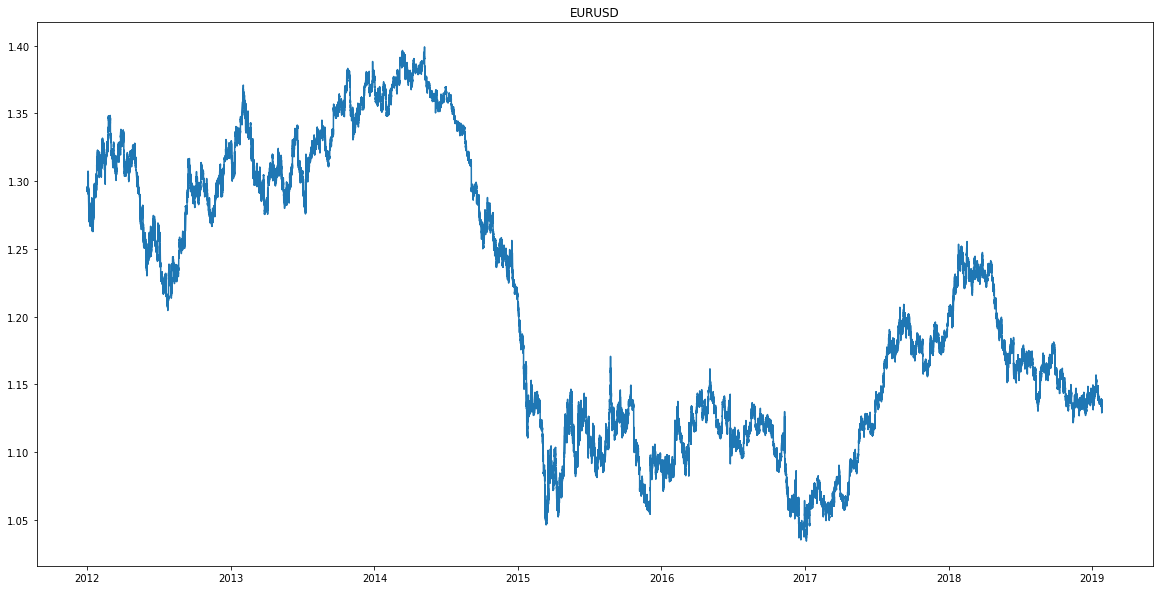

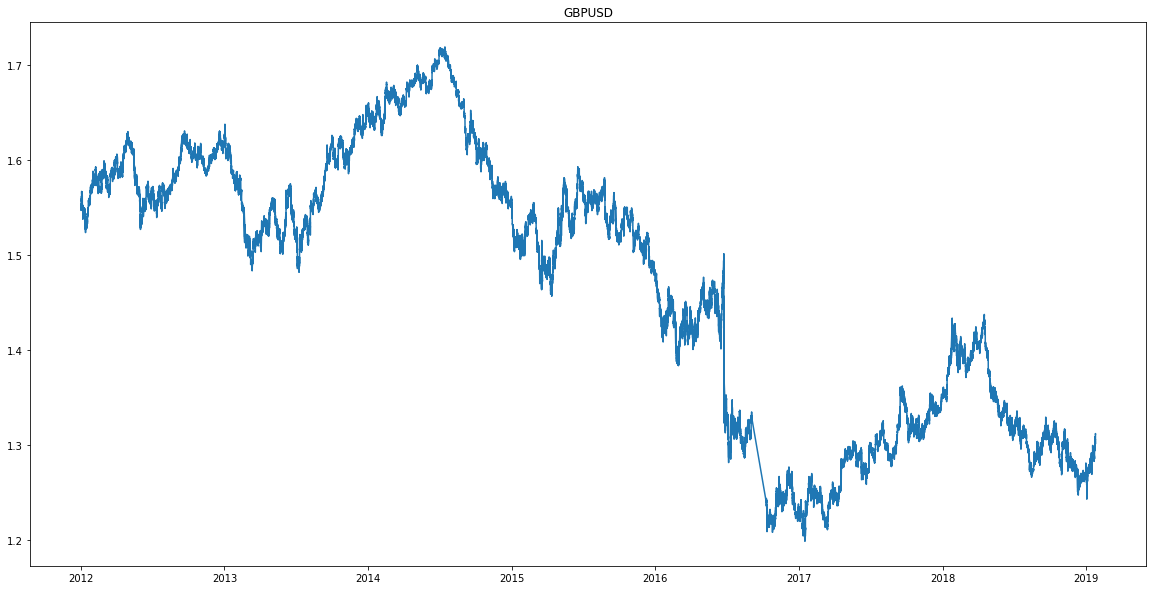

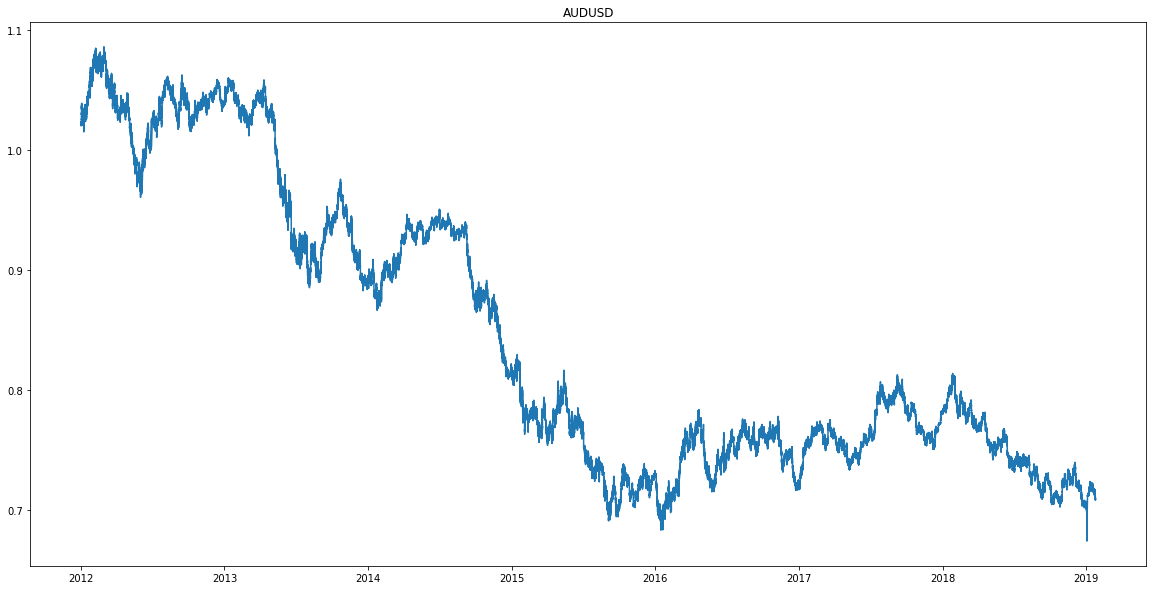

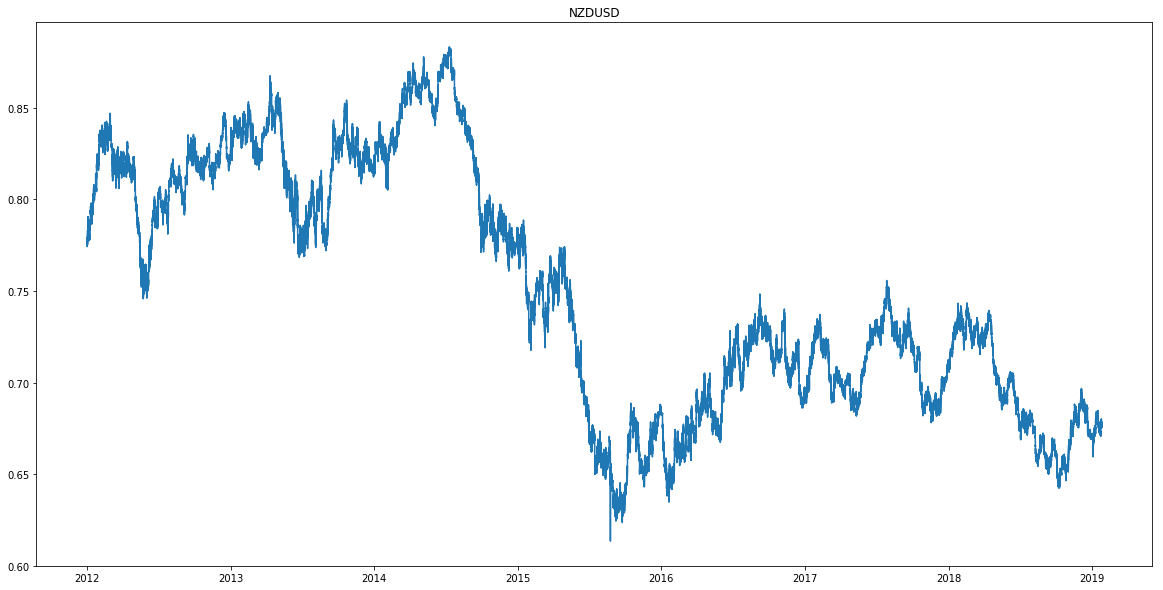

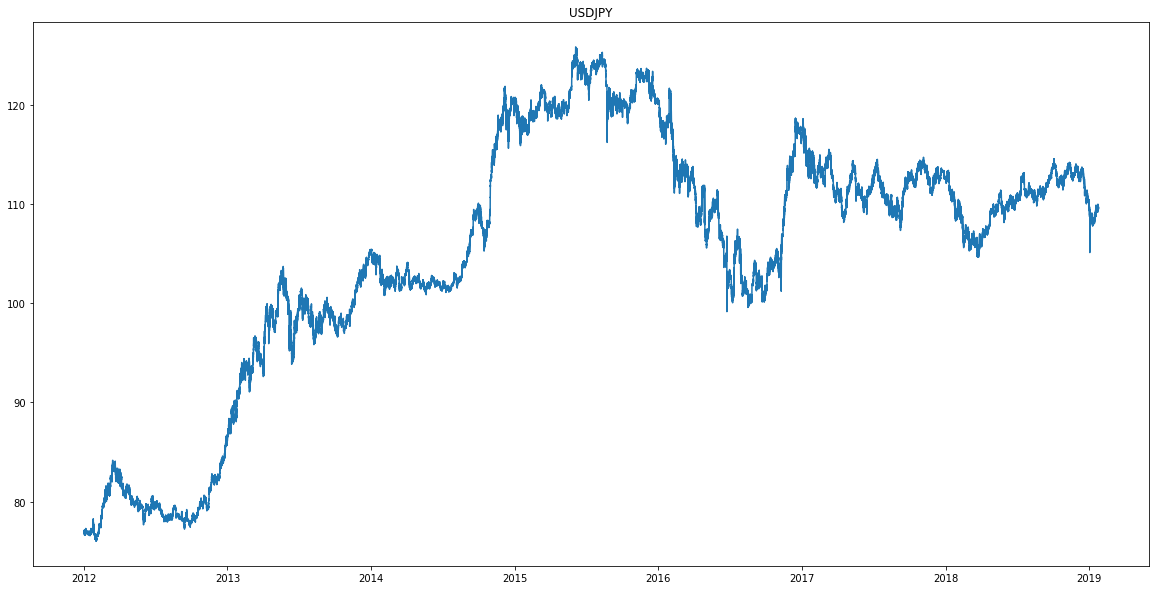

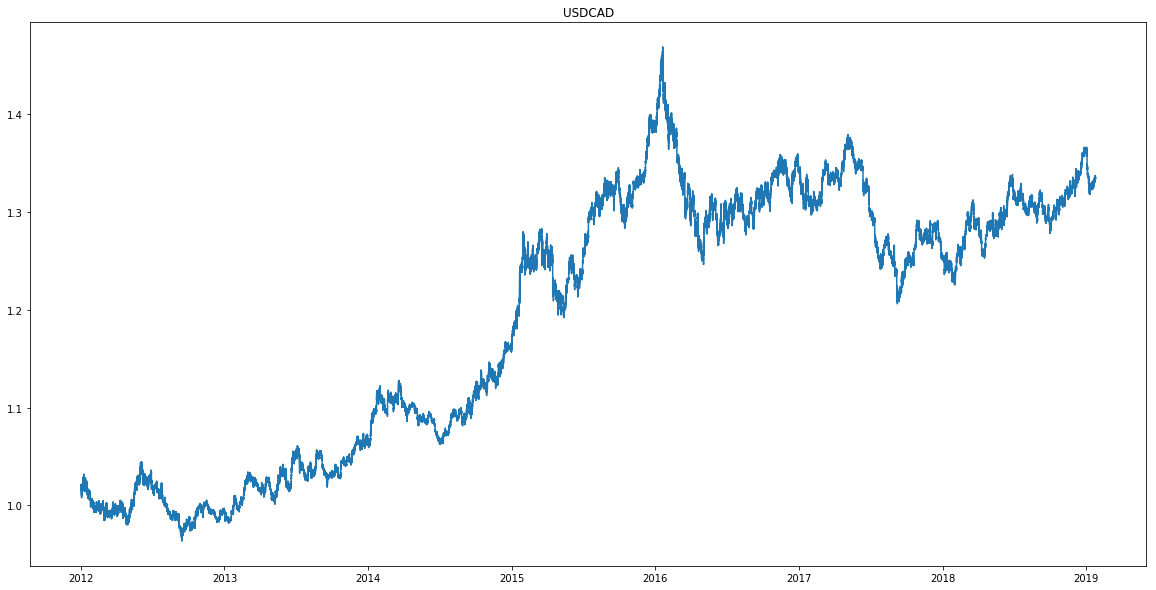

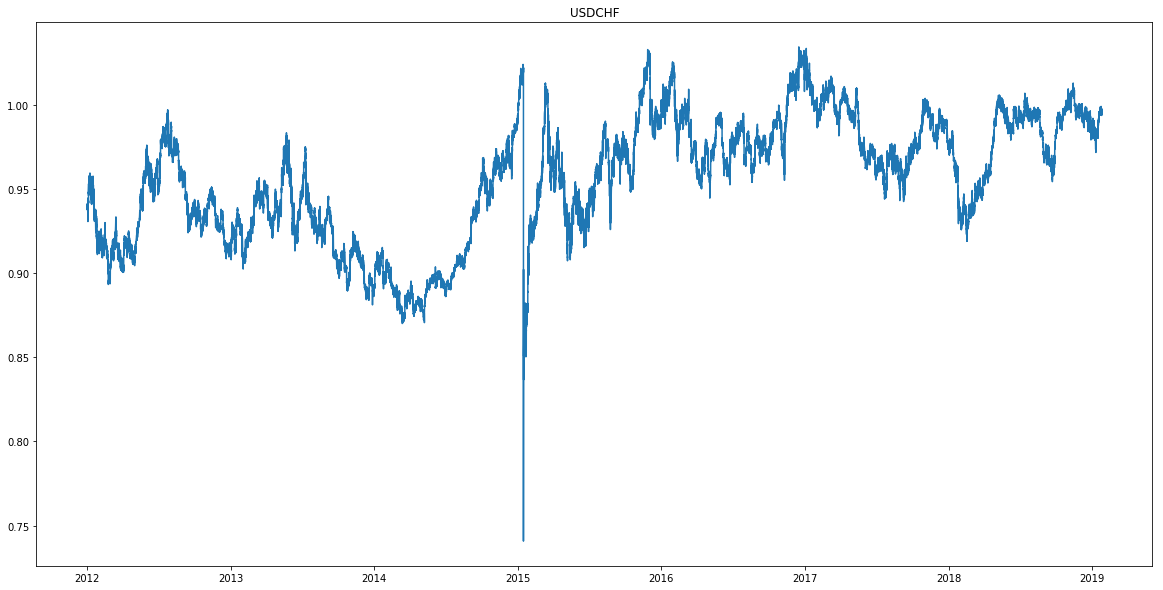

In [39]:
for symbol in symbols:
    plt.figure(figsize=(20,10))
    plt.title(symbol)
    plt.plot(df[symbol]['Close'])
    plt.show()

In [41]:
fromdate = datetime(2018, 11, 1)
todate = datetime(2019, 1, 31)
newdf = dict()
for symbol in symbols:
    newdf[symbol] = getDateRange(df[symbol], fromdate, todate)

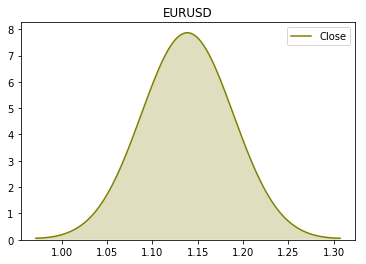

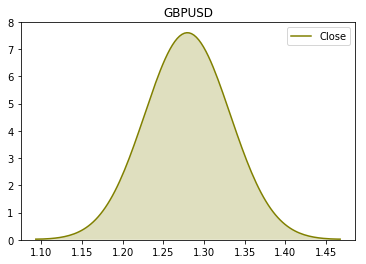

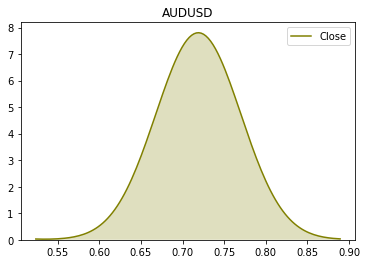

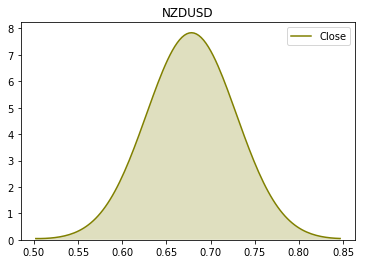

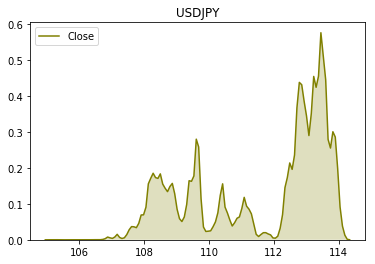

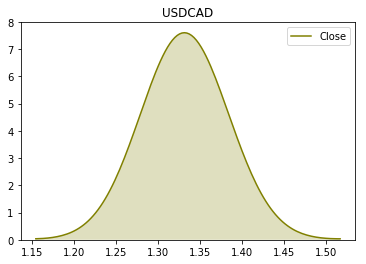

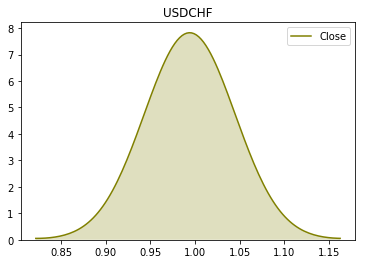

In [45]:
for symbol in symbols:
    plt.title(symbol)
    sns.kdeplot(newdf[symbol]['Close'], shade=True, bw=.05, color="olive");
    plt.show()

In [108]:
fig = tools.make_subplots(rows=len(symbols), cols=1)
i = 1
for symbol in symbols:
    trace = go.Box(
        y = newdf[symbol]['Close'],
        boxpoints = 'suspectedoutliers',
        marker = dict(color = 'rgb(7,40,89)')
    )
    fig.append_trace(trace, i, 1)
    i += 1

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]
[ (5,1) x5,y5 ]
[ (6,1) x6,y6 ]
[ (7,1) x7,y7 ]



In [110]:
fig['layout'].update(height=2000, width=800, title='i <3 annotations and subplots')
py.iplot(fig, filename='fx plot')

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of chart

In [95]:
symbol_name = 'USDCAD'
last_price = 1.30993

In [79]:
trace0 = go.Box(
    y = newdf[symbol_name]['Close'],
    boxpoints = 'suspectedoutliers',
    marker = dict(color = 'rgb(7,40,89)')
)

In [80]:
data = [trace0]
py.iplot(data)

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [101]:
fig = {
    'data': [{
        'type': 'violin',
        'y': newdf[symbol_name]['Close'],
        'box': { 'visible': True },
        'line': { 'color': 'black' },
        'meanline': { 'visible': True },
        'fillcolor': '#8dd3c7',
        'opacity': 0.6,
        'x0': symbol_name
    }],
    'layout': {
        'title': symbol_name,
        'yaxis': { 'zeroline': False },
        'shapes': [
            # Line Horizontal
            {
                'type': 'line',
                'opacity': 0.7,
                'x0': 0.5,
                'y0': last_price,
                'x1': 1,
                'y1': last_price,
                'line': {
                    'color': 'rgb(50, 171, 96)',
                    'width': 4,
                    'dash': 'dashdot',
                },
            }
        ]
    }
}
py.iplot(fig, filename = 'violin', validate = False)

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [113]:
mean = dict()
high = dict()
low = dict()
sd = dict()
twosd = dict()
tripplesd = dict()

for symbol in symbols:
    mean[symbol] = np.mean(newdf[symbol]['Close'])
    high[symbol] = np.max(newdf[symbol]['High'])
    low[symbol] = np.min(newdf[symbol]['Low'])
    sd[symbol] = np.std(newdf[symbol]['Close'])
    twosd[symbol] = sd[symbol] * 2
    tripplesd[symbol] = sd[symbol] * 3

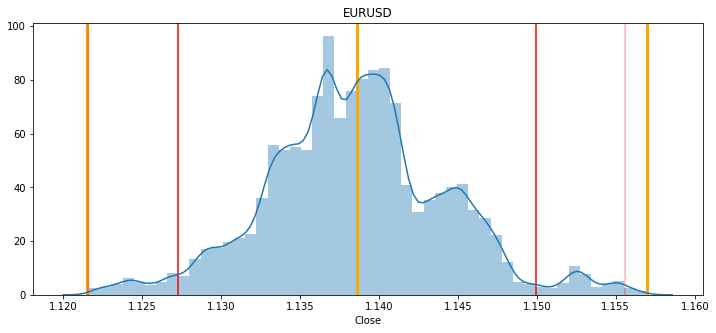

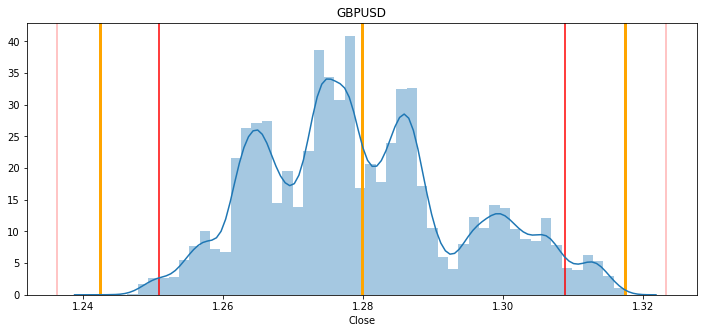

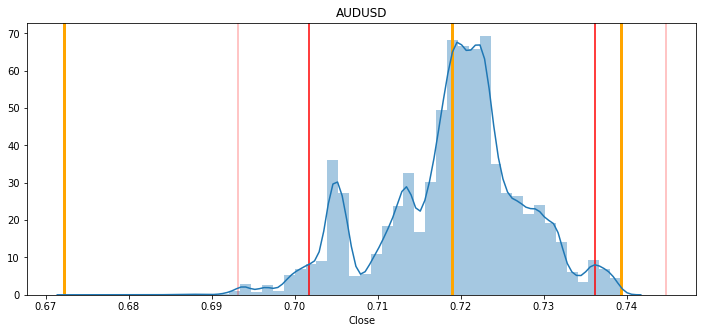

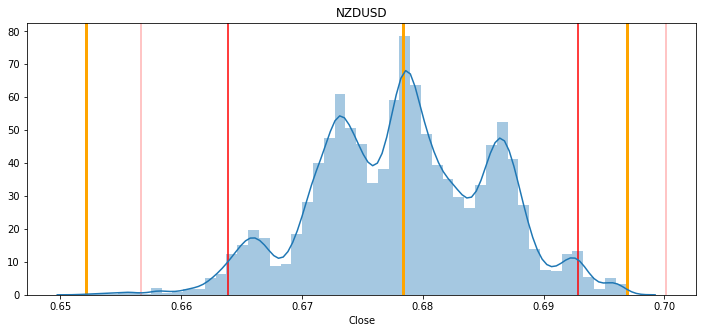

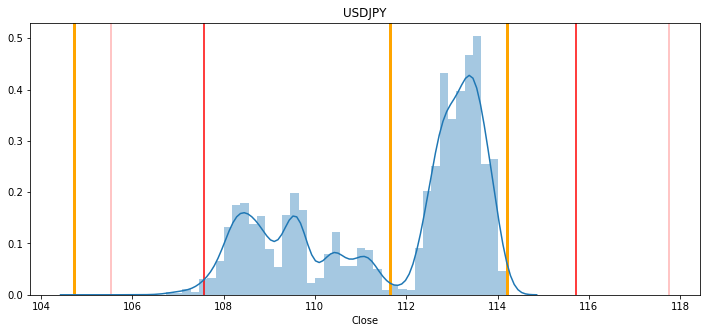

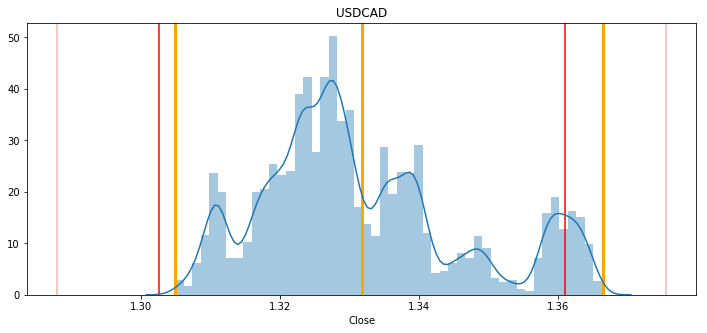

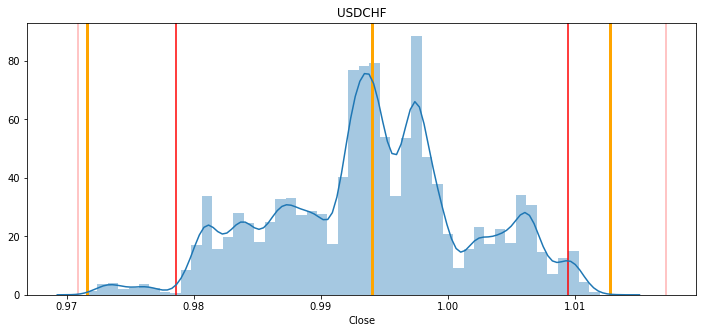

In [115]:
for symbol in symbols:
    plt.figure(figsize=(12,5))
    plt.title(symbol)
    plt.axvline(x=mean[symbol], color='orange', linewidth='3')
    plt.axvline(x=high[symbol], color='orange', linewidth='3')
    plt.axvline(x=low[symbol], color='orange', linewidth='3')
    plt.axvline(x=(twosd[symbol] + mean[symbol]), color='red')
    plt.axvline(x=(mean[symbol] - twosd[symbol]), color='red')
    plt.axvline(x=(mean[symbol] + tripplesd[symbol]), color='red', alpha=0.3)
    plt.axvline(x=(mean[symbol] - tripplesd[symbol]), color='red', alpha=0.3)
    #plt.plot(marker=newdf.iloc[-1]['Close'])
    sns.distplot(newdf[symbol]['Close']);